## Breast Cancer Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
df = pd.read_csv("C:/Users//KIIT//Downloads//archive (5)//breast-cancer-wisconsin.data")
df.columns = ['id_number','clump_thickness','cell_size','cell_shape','marginal_adhesion','single_cell_ep_size','bare_nuclei','bland_chromatin',
              'normal_nuclei','mitoses','class']
df = df.set_index('id_number')

In [5]:
df.head()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_cell_ep_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,class
id_number,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


In [6]:
df.tail()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_cell_ep_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,class
id_number,,,,,,,,,,
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4
897471,4,8,8,5,4,5,10,4,1,4


In [7]:
df.shape

(698, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 1002945 to 897471
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   clump_thickness      698 non-null    int64 
 1   cell_size            698 non-null    int64 
 2   cell_shape           698 non-null    int64 
 3   marginal_adhesion    698 non-null    int64 
 4   single_cell_ep_size  698 non-null    int64 
 5   bare_nuclei          698 non-null    object
 6   bland_chromatin      698 non-null    int64 
 7   normal_nuclei        698 non-null    int64 
 8   mitoses              698 non-null    int64 
 9   class                698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.0+ KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 1002945 to 897471
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   clump_thickness      698 non-null    int64 
 1   cell_size            698 non-null    int64 
 2   cell_shape           698 non-null    int64 
 3   marginal_adhesion    698 non-null    int64 
 4   single_cell_ep_size  698 non-null    int64 
 5   bare_nuclei          698 non-null    object
 6   bland_chromatin      698 non-null    int64 
 7   normal_nuclei        698 non-null    int64 
 8   mitoses              698 non-null    int64 
 9   class                698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.0+ KB


In [10]:
cols = df.columns.tolist()
for col in cols:
    print(df[col].value_counts())
# There is a string '?' in bare_nuclei, let's replace it with a Null value and the drop the rows containing those values
df = df.replace('?', pd.NA).dropna()
df['bare_nuclei'].isna().sum()
df['bare_nuclei'].value_counts()

clump_thickness
1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
cell_size
1     383
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
cell_shape
1     352
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
marginal_adhesion
1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
single_cell_ep_size
2     385
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
bare_nuclei
1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
bland_chromatin
2     166
3     164
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: count, dtype: int64
norma

bare_nuclei
1     401
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [11]:
df['class'] = df['class'].apply(lambda x : 1 if x == 4 else 0)
df

,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_cell_ep_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,class
id_number,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0
1017122,8,10,10,8,7,10,9,7,1,1
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,0
841769,2,1,1,1,2,1,1,1,1,0
888820,5,10,10,3,7,3,8,10,2,1


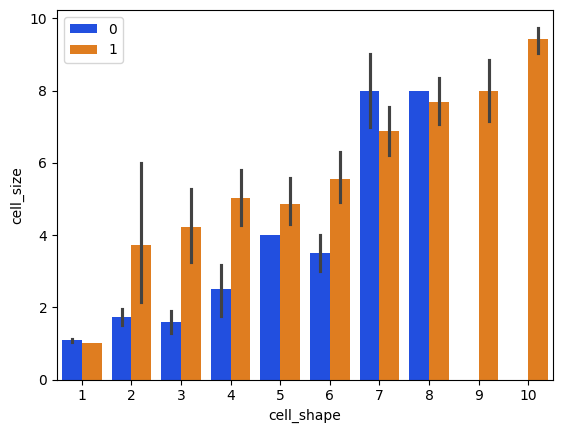

In [12]:
sns.barplot(data=df,x='cell_shape',y='cell_size',hue='class',palette='bright')
plt.xlabel('cell_shape')
plt.ylabel('cell_size')
plt.legend()

<Axes: xlabel='cell_shape', ylabel='clump_thickness'>

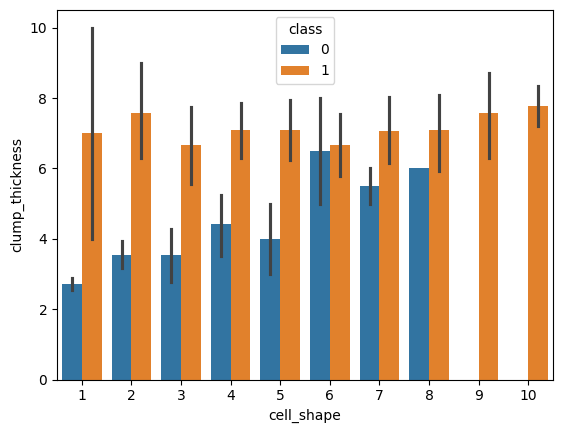

In [13]:
sns.barplot(data=df,x='cell_shape', y='clump_thickness',hue='class')

<Axes: xlabel='clump_thickness', ylabel='marginal_adhesion'>

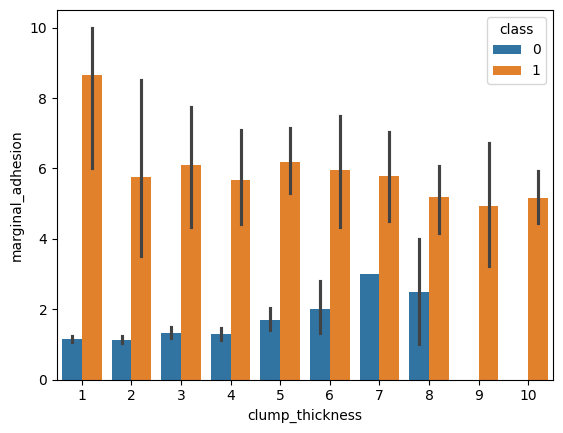

In [15]:
 sns.barplot(data=df,x='clump_thickness',y='marginal_adhesion',hue='class')

<Axes: xlabel='bland_chromatin', ylabel='mitoses'>

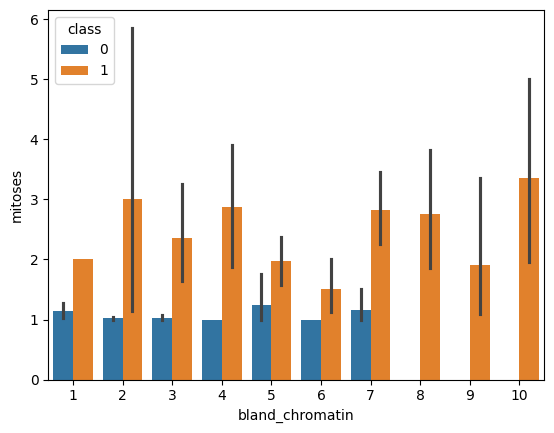

In [16]:
sns.barplot(data=df,x='bland_chromatin',y='mitoses',hue='class')

In [19]:
X = df.drop(columns='class',axis=1)
y = df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [20]:
rf = RandomForestClassifier(n_estimators=100)
randomforest = rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

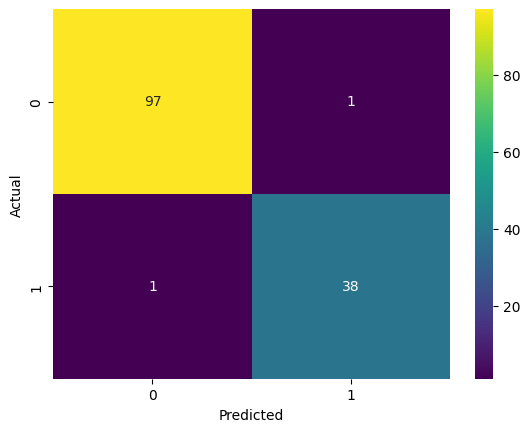

In [21]:
cm =confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
cv_scores = []
lg = LogisticRegression()
# Perform cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lg.fit(X_train,y_train)
    y_pred = lg.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    cv_scores.append(mae)
# Calculate the avarege MAE
average_mae = np.mean(cv_scores)

print("Average MAE score:", average_mae)

Average MAE score: 0.03370545298411336


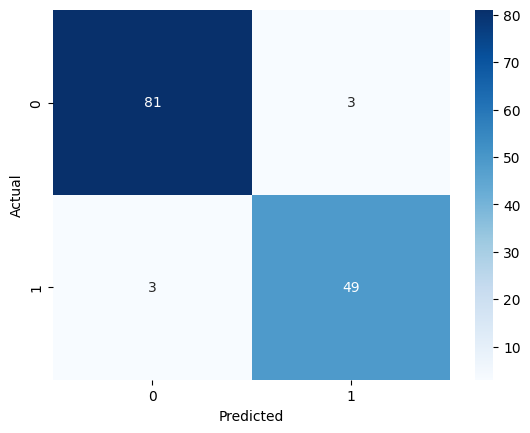

In [24]:
cm_lg =confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lg,annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


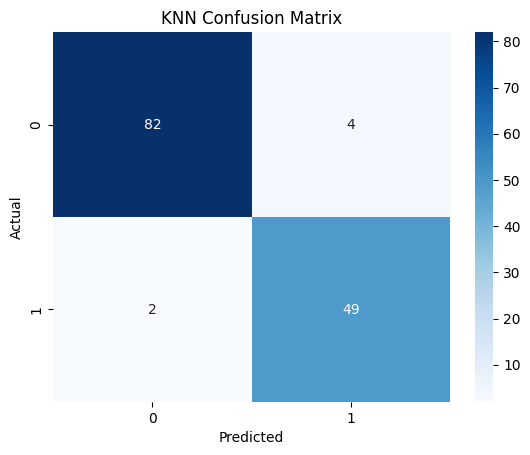

Average MAE score for KNN: 0.026352511807642764


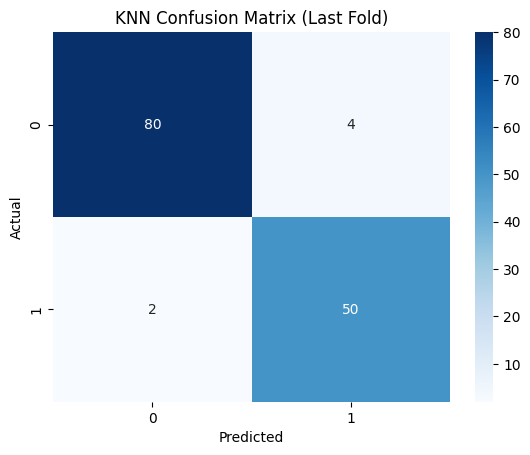

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(columns='class', axis=1)

y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

knn_cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

knn_cv_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_mae = mean_absolute_error(y_test, y_pred)
    knn_cv_scores.append(knn_mae)

average_knn_mae = np.mean(knn_cv_scores)
print("Average MAE score for KNN:", average_knn_mae)

knn_cm_last = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm_last, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix (Last Fold)')
plt.show()